# Candlestick Belt-hold

https://www.investopedia.com/terms/b/bullishbelthold.asp

https://www.investopedia.com/terms/b/bearishbelthold.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Belt-hold

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

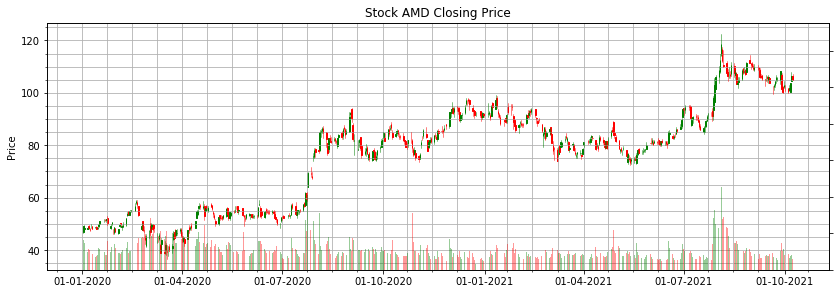

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
belt_hold = talib.CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Close'])

belt_hold = belt_hold[belt_hold != 0]

In [6]:
df['belt_hold'] = talib.CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['belt_hold'] !=0]

,Open,High,Low,Close,Adj Close,Volume,belt_hold
Date,,,,,,,
2020-02-10,49.470001,52.299999,49.349998,52.259998,52.259998,60971700,100
2020-02-18,54.939999,58.130001,54.840000,56.889999,56.889999,70133200,100
2020-02-21,56.709999,56.799999,52.889999,53.279999,53.279999,88271100,-100
2020-02-25,51.139999,51.240002,47.119999,47.570000,47.570000,88699400,-100
2020-03-24,44.040001,46.810001,43.990002,46.220001,46.220001,106794200,100
...,...,...,...,...,...,...,...
2021-08-04,114.360001,122.489998,114.160004,118.769997,118.769997,225368700,100
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300,-100
2021-08-27,108.010002,111.779999,107.800003,111.400002,111.400002,60970800,100


In [8]:
df['Adj Close'].loc[df['belt_hold'] !=0]

Date
2020-02-10     52.259998
2020-02-18     56.889999
2020-02-21     53.279999
2020-02-25     47.570000
2020-03-24     46.220001
                 ...    
2021-08-04    118.769997
2021-08-24    107.650002
2021-08-27    111.400002
2021-09-10    105.199997
2021-10-06    103.639999
Name: Adj Close, Length: 67, dtype: float64

In [9]:
df['Adj Close'].loc[df['belt_hold'] !=0].index

DatetimeIndex(['2020-02-10', '2020-02-18', '2020-02-21', '2020-02-25',
               '2020-03-24', '2020-03-26', '2020-04-06', '2020-04-13',
               '2020-04-14', '2020-04-28', '2020-05-04', '2020-05-11',
               '2020-05-21', '2020-05-26', '2020-05-29', '2020-06-15',
               '2020-06-26', '2020-07-22', '2020-07-24', '2020-07-30',
               '2020-08-04', '2020-08-10', '2020-08-11', '2020-08-27',
               '2020-08-31', '2020-09-02', '2020-09-10', '2020-09-11',
               '2020-09-16', '2020-09-21', '2020-09-29', '2020-10-01',
               '2020-10-05', '2020-10-14', '2020-10-21', '2020-10-28',
               '2020-11-10', '2020-12-23', '2020-12-28', '2021-01-07',
               '2021-01-11', '2021-01-20', '2021-01-28', '2021-02-16',
               '2021-02-22', '2021-03-02', '2021-03-03', '2021-03-23',
               '2021-03-31', '2021-04-12', '2021-04-21', '2021-04-22',
               '2021-04-23', '2021-05-03', '2021-05-10', '2021-05-28',
      

In [10]:
belt_hold

Date
2020-02-10    100
2020-02-18    100
2020-02-21   -100
2020-02-25   -100
2020-03-24    100
             ... 
2021-08-04    100
2021-08-24   -100
2021-08-27    100
2021-09-10   -100
2021-10-06    100
Length: 67, dtype: int32

In [11]:
belt_hold.index

DatetimeIndex(['2020-02-10', '2020-02-18', '2020-02-21', '2020-02-25',
               '2020-03-24', '2020-03-26', '2020-04-06', '2020-04-13',
               '2020-04-14', '2020-04-28', '2020-05-04', '2020-05-11',
               '2020-05-21', '2020-05-26', '2020-05-29', '2020-06-15',
               '2020-06-26', '2020-07-22', '2020-07-24', '2020-07-30',
               '2020-08-04', '2020-08-10', '2020-08-11', '2020-08-27',
               '2020-08-31', '2020-09-02', '2020-09-10', '2020-09-11',
               '2020-09-16', '2020-09-21', '2020-09-29', '2020-10-01',
               '2020-10-05', '2020-10-14', '2020-10-21', '2020-10-28',
               '2020-11-10', '2020-12-23', '2020-12-28', '2021-01-07',
               '2021-01-11', '2021-01-20', '2021-01-28', '2021-02-16',
               '2021-02-22', '2021-03-02', '2021-03-03', '2021-03-23',
               '2021-03-31', '2021-04-12', '2021-04-21', '2021-04-22',
               '2021-04-23', '2021-05-03', '2021-05-10', '2021-05-28',
      

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,belt_hold
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0
2021-10-06,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,100


Text(0, 0.5, 'Price')

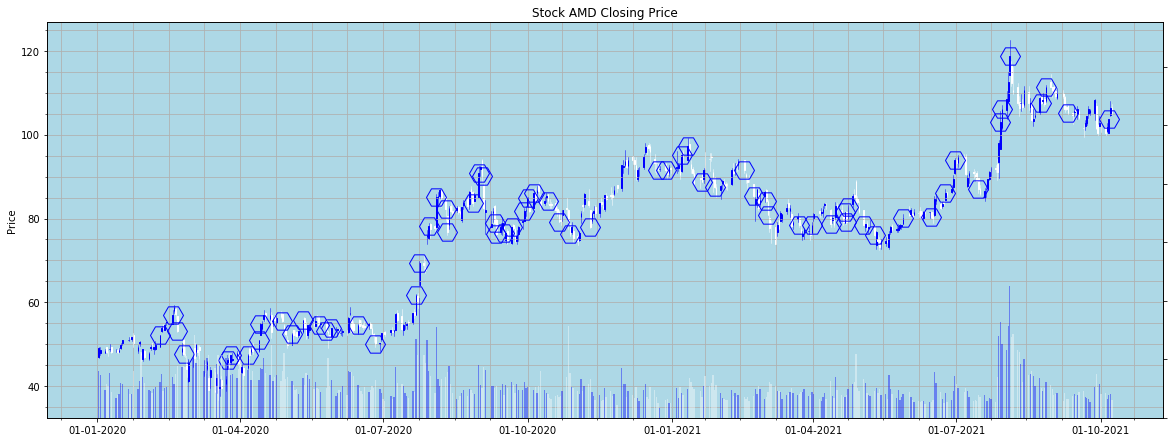

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='b', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['belt_hold'] !=0].index, df['Adj Close'].loc[df['belt_hold'] !=0],
                'Hb', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=20.0) 
colors = dfc.VolumePositive.map({True: 'b', False: 'w'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-09-01':'2021-10-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,belt_hold,VolumePositive
0,738034.0,111.300003,111.849998,109.849998,109.989998,109.989998,38579600,0,False
1,738035.0,110.320000,110.879997,108.769997,109.199997,109.199997,40090500,0,False
2,738036.0,108.849998,111.169998,108.500000,109.919998,109.919998,42605800,0,True
3,738040.0,109.959999,110.580002,108.660004,109.150002,109.150002,28815200,0,False
4,738041.0,108.879997,109.300003,105.519997,106.169998,106.169998,43067900,0,False


Text(0, 0.5, 'Price')

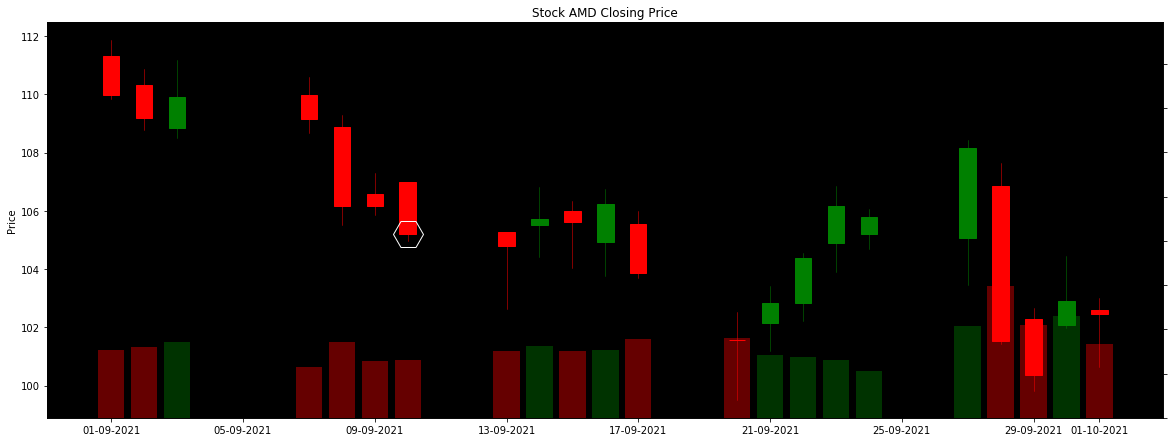

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('black')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['belt_hold'] !=0].index, df['Adj Close'].loc[df['belt_hold'] !=0],
                'Hw', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

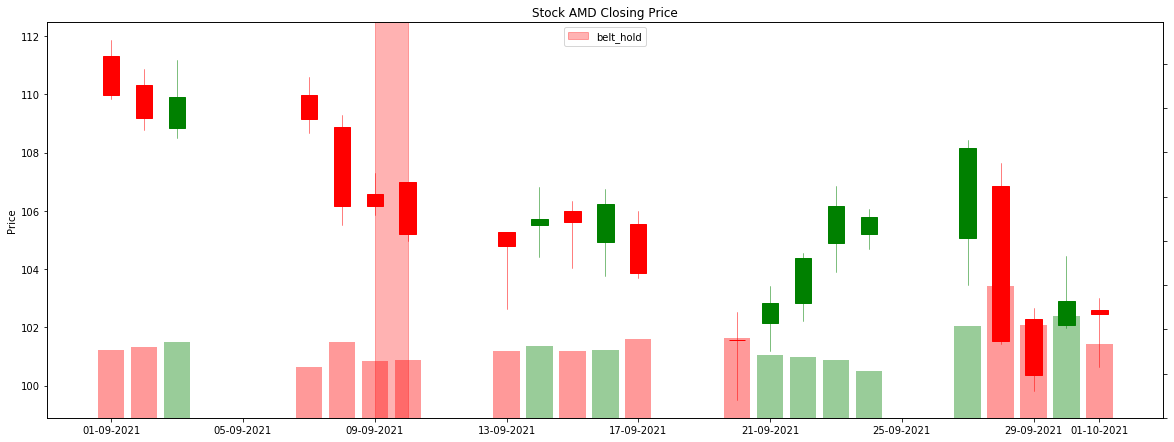

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,9,9)), date2num(datetime(2021,9,10)), 
           label="belt_hold",color="red", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')